# PCA
Find the SLC (e.g. a projection) with maximum variance: 
$$\max_{a:||a||=1}Var(a^TX) = \max_{a:||a||=1}a^TVar(X)a$$

Setting $a=\gamma$, with $\gamma$ the Eigenvector of the largest Eigenvalue $\lambda$ of $Var(X)$ will satisfy this OP.

$$Var(X) \gamma=\lambda \gamma$$
$$(Var(X)-\lambda I)\gamma=0$$
$$ |Var(X)-\lambda I|=0$$

Yields Eigenvalues $\lambda$ of Var(X). Plugging back into second equation above gives Eigenvectors. The result can be written as:

$$\boldsymbol{\lambda}=\boldsymbol{\gamma}^TVar(X)\boldsymbol{\gamma}$$

Where $\boldsymbol{\lambda}$ is the diagonal matrix of Eigenvalues and $\boldsymbol{\gamma}$ is the corresponding matrix of Eigenvectors. Rearanging gives the spectral decomposition of the covarianvce matrix.

$$Var(X)=\boldsymbol{\gamma}\boldsymbol{\lambda}\boldsymbol{\gamma}^T$$

The transformation of X onto the orthonormal basis spanned by $\gamma$ is:
$$X_{PCA}=\boldsymbol{\gamma}^TX$$

# Libs & Defs

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import math

from sklearn.decomposition import PCA, KernelPCA

# Load Dataset

In [2]:
df = pd.read_csv('Marktzinsen_mod.csv', sep=',')

df['Datum'] = pd.to_datetime(df['Datum'],infer_datetime_format=True)

df.set_index('Datum', drop=True, inplace=True)

df.index.names = [None]

df.drop('Index', axis=1, inplace=True)

dt = df.transpose()

# Visualizing the Dataset

In [5]:
df.head()

,1M,2M,3M,6M,1J,2J,3J,4J,5J,6J,7J,8J,9J,10J
1992-02-29,0.0961,0.09610,0.0961,0.0958,0.0898,0.0864,0.0849,0.0837,0.0826,0.0817,0.0810,0.0806,0.0803,0.0804
1992-03-31,0.0970,0.09700,0.0970,0.0969,0.0912,0.0889,0.0877,0.0864,0.0852,0.0841,0.0833,0.0827,0.0823,0.0823
1992-04-30,0.0975,0.09750,0.0975,0.0975,0.0920,0.0892,0.0877,0.0862,0.0848,0.0837,0.0828,0.0822,0.0817,0.0816
1992-05-31,0.0978,0.09785,0.0979,0.0979,0.0920,0.0889,0.0874,0.0860,0.0847,0.0836,0.0828,0.0821,0.0817,0.0815
1992-06-30,0.0974,0.09745,0.0975,0.0975,0.0931,0.0904,0.0889,0.0874,0.0860,0.0848,0.0839,0.0832,0.0827,0.0825


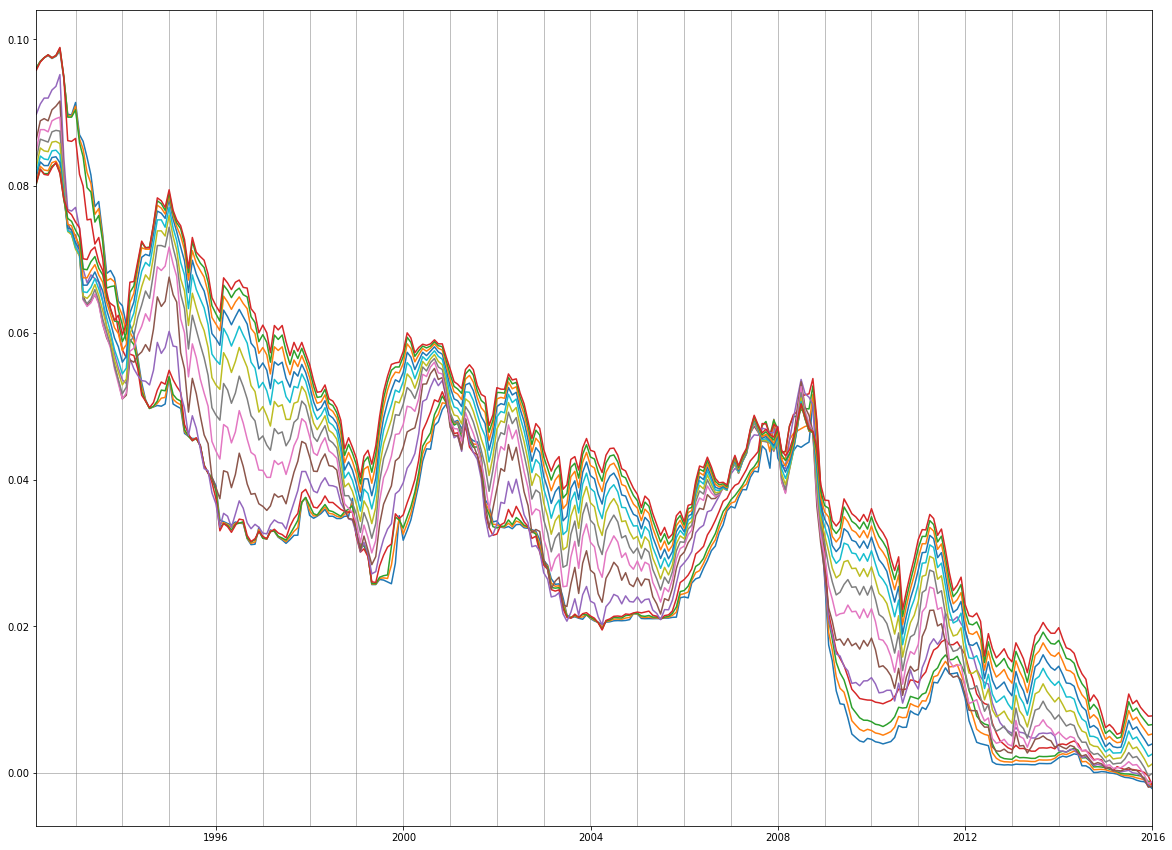

In [3]:
plt.figure(figsize=(20,15))

plt.plot(df.index, df)
plt.xlim(df.index.min(), df.index.max())
# plt.ylim(0, 0.1)
plt.axhline(y=0,c="grey",linewidth=0.5,zorder=0)
for i in range(df.index.min().year, df.index.max().year+1):
    plt.axvline(x=df.index[df.index.searchsorted(pd.datetime(i,1,1))-1],
                c="grey", linewidth=0.5, zorder=0)

In [4]:
cols = 6
num_years = df.index.max().year-df.index.min().year
rows = math.ceil(num_years/cols)

plt.figure(figsize=(24,(24/cols)*rows))

plt.subplot2grid((rows,cols), (0,0), colspan=cols, rowspan=fig1_rows)


colnum = 0
rownum = 0
for year in range(df.index.min().year,df.index.max().year+1):
    year_start = df.index[df.index.searchsorted(pd.datetime(year,1,1))]
    year_end = df.index[df.index.searchsorted(pd.datetime(year,12,31))]
    
    plt.subplot2grid((rows,cols), (rownum,colnum), colspan=1, rowspan=1)
    plt.title('{0}'.format(year))
    plt.xlim(0, len(dt.index)-1)
    plt.ylim(np.min(dt.values), np.max(dt.values))
    plt.xticks(range(len(dt.index)), dt.index, size='small')
    
    plt.plot(dt.ix[:,year_start:year_end].values)
    
    if colnum != cols-1:
        colnum += 1
    else:
        colnum = 0
        rownum += 1

None

NameError: name 'fig1_rows' is not defined

<Figure size 1728x1152 with 0 Axes>

# Projection onto Principal Components

In [69]:
# calculate the PCA (Eigenvectors & Eigenvalues of the covariance matrix)
pcaA = PCA(n_components=3, copy=True, whiten=False)

# pcaA = KernelPCA(n_components=3,
#                  kernel='rbf',
#                  gamma=2.0, # default 1/n_features
#                  kernel_params=None,
#                  fit_inverse_transform=False,
#                  eigen_solver='auto',
#                  tol=0,
#                  max_iter=None)

# transform the dataset onto the first two eigenvectors
# kjp: change to diff
doPreFC = True
if doPreFC:
    df_in = df[ df.index < "2009-01-01"]
else:
    df_in = df.copy()
    
doDiff = True
if doDiff:
    df_in = df_in.diff(axis=0).dropna()

    
pcaA.fit(df_in)
dpca = pd.DataFrame(pcaA.transform(df_in))
dpca.index = df_in.index

In [70]:
df_in.tail()

,1M,2M,3M,6M,1J,2J,3J,4J,5J,6J,7J,8J,9J,10J
2008-08-31,0.00032,0.00013,-0.00005,0.00013,-0.00050,-0.00113,-0.00159,-0.00167,-0.00162,-0.00164,-0.00167,-0.00168,-0.00167,-0.00168
2008-09-30,0.00539,0.00427,0.00314,0.00208,-0.00102,-0.00220,-0.00137,-0.00077,-0.00039,-0.00023,-0.00015,-0.00019,-0.00028,-0.00036
2008-10-31,-0.00616,-0.00567,-0.00517,-0.00573,-0.01028,-0.01015,-0.00882,-0.00752,-0.00647,-0.00544,-0.00443,-0.00352,-0.00274,-0.00211
2008-11-30,-0.00860,-0.00883,-0.00907,-0.00907,-0.00694,-0.00504,-0.00527,-0.00552,-0.00550,-0.00541,-0.00538,-0.00532,-0.00522,-0.00512
2008-12-31,-0.00940,-0.00933,-0.00925,-0.00897,-0.00619,-0.00397,-0.00270,-0.00224,-0.00212,-0.00206,-0.00203,-0.00200,-0.00205,-0.00212


In [71]:
for i,pc in enumerate(pcaA.explained_variance_ratio_):
    print('{0}.\t{1:2.2f}%'.format(i+1,pc*100.0))

1.	76.38%
2.	18.23%
3.	3.63%


In [30]:
df.shape

(287, 14)

In [31]:
pcaA.components_.shape

(3, 14)

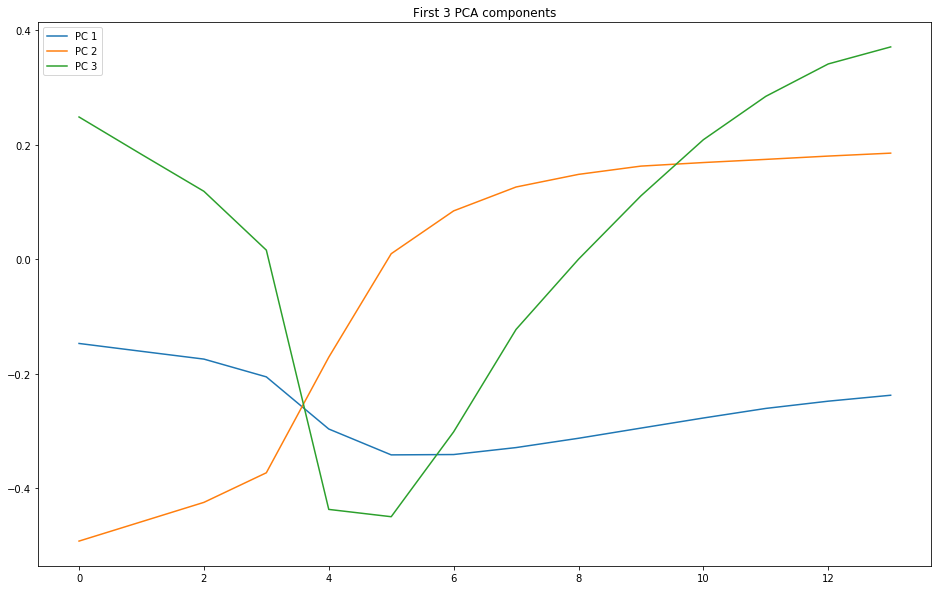

In [72]:
fig = plt.figure(figsize=(16,10))
plt.title('First {0} PCA components'.format(np.shape(np.transpose(pcaA.components_))[-1]))

plt.plot(np.transpose(pcaA.components_) )
plt.legend(["PC 1", "PC 2", "PC 3"])

None

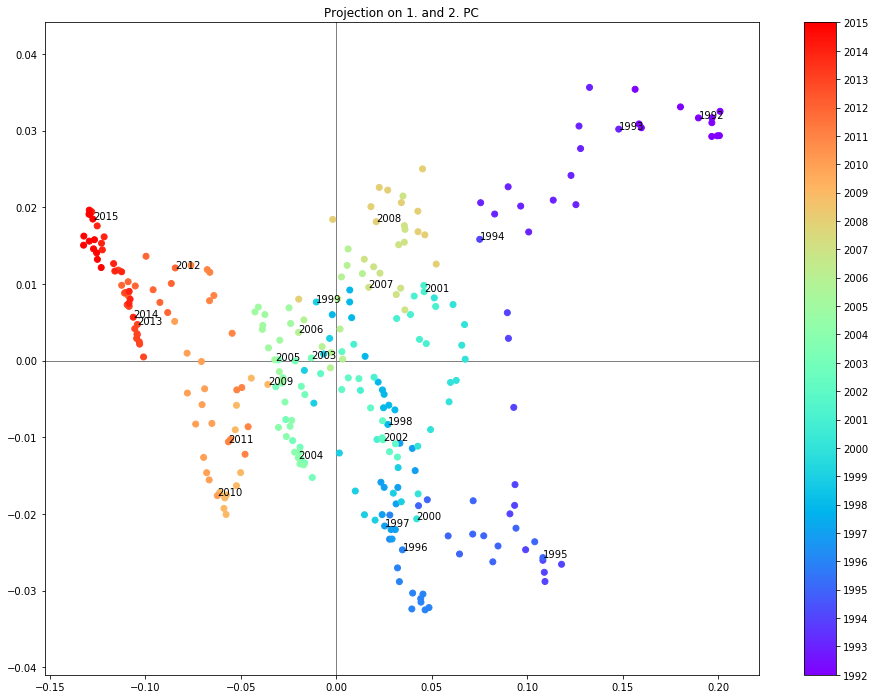

In [26]:
# plot the result
merged_years = 1
pc1 = 0
pc2 = 1
fig = plt.figure(figsize=(16,12))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)
    
sc = plt.scatter(dpca.loc[:,pc1],dpca.loc[:,pc2], c=[d.year for d in dpca.index], cmap='rainbow')
cb = plt.colorbar(sc)
cb.set_ticks(ticks=np.unique([d.year for d in dpca.index])[::1])
cb.set_ticklabels(np.unique([d.year for d in dpca.index])[::1])

for year in range(df.index.min().year,df.index.max().year+1,merged_years):
    year_start = df.index[df.index.searchsorted(pd.datetime(year,1,1))]
    year_end = df.index[df.index.searchsorted(pd.datetime(year+merged_years-1,12,31))]
    
    plt.annotate('{0}'.format(year), xy=(dpca.loc[year_start,pc1],dpca.loc[year_start,pc2]), xytext=(dpca.loc[year_start,pc1],dpca.loc[year_start,pc2]))

None

In [ ]:
# plot the result
merged_years = 1
pc1 = 0
pc2 = 2
fig = plt.figure(figsize=(16,12))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)
    
sc = plt.scatter(dpca.loc[:,pc1],dpca.loc[:,pc2], c=[d.year for d in dpca.index], cmap='rainbow')
cb = plt.colorbar(sc)
cb.set_ticks(ticks=np.unique([d.year for d in dpca.index])[::1])
cb.set_ticklabels(np.unique([d.year for d in dpca.index])[::1])

for year in range(df.index.min().year,df.index.max().year+1,merged_years):
    year_start = df.index[df.index.searchsorted(pd.datetime(year,1,1))]
    year_end = df.index[df.index.searchsorted(pd.datetime(year+merged_years-1,12,31))]
    
    plt.annotate('{0}'.format(year), xy=(dpca.loc[year_start,pc1],dpca.loc[year_start,pc2]), xytext=(dpca.loc[year_start,pc1],dpca.loc[year_start,pc2]))

None

In [ ]:
# plot the result
merged_years = 1
pc1 = 1
pc2 = 2
fig = plt.figure(figsize=(16,12))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)
    
sc = plt.scatter(dpca.loc[:,pc1],dpca.loc[:,pc2], c=[d.year for d in dpca.index], cmap='rainbow')
cb = plt.colorbar(sc)
cb.set_ticks(ticks=np.unique([d.year for d in dpca.index])[::1])
cb.set_ticklabels(np.unique([d.year for d in dpca.index])[::1])

for year in range(df.index.min().year,df.index.max().year+1,merged_years):
    year_start = df.index[df.index.searchsorted(pd.datetime(year,1,1))]
    year_end = df.index[df.index.searchsorted(pd.datetime(year+merged_years-1,12,31))]
    
    plt.annotate('{0}'.format(year), xy=(dpca.loc[year_start,pc1],dpca.loc[year_start,pc2]), xytext=(dpca.loc[year_start,pc1],dpca.loc[year_start,pc2]))

None

# Principal Components by Year

In [ ]:
pca = PCA(n_components=2, copy=True, whiten=False)

merged_years = 4

cols = 3
num_years = df.index.max().year-df.index.min().year
rows = math.ceil(num_years/cols)

plt.figure(figsize=(24,(24/cols)*rows))

colnum = 0
rownum = 0
for year in range(df.index.min().year,df.index.max().year+1,merged_years):
    year_start = df.index[df.index.searchsorted(pd.datetime(year,1,1))]
    year_end = df.index[df.index.searchsorted(pd.datetime(year+merged_years-1,12,31))]
    
    pca.fit(df.ix[year_start:year_end,:].values)
    pca_components = np.transpose(pca.components_)

    plt.subplot2grid((rows,cols), (rownum,colnum), colspan=1, rowspan=1)
    plt.title('{0} - {1}'.format(year_start.year, year_end.year))
    plt.xlim(0, len(pca_components)-1)
    plt.ylim(-0.5, 0.6)
    plt.xticks(range(len(pca_components)), dt.index, size='small')
    
    for i, comp in enumerate(pca.components_):
        plt.plot(pcaA.components_[i], label='{0}. PC'.format(i+1), color='#dddddd')
        plt.plot(comp, label='{0}. PC'.format(i+1))
    plt.legend(loc='upper right')
    
    if colnum != cols-1:
        colnum += 1
    else:
        colnum = 0
        rownum += 1

None

In [ ]:
pca = PCA(n_components=2, copy=True, whiten=False)

merged_years = 4

cols = 3
num_years = df.index.max().year-df.index.min().year
rows = math.ceil(num_years/cols)

plt.figure(figsize=(24,(24/cols)*rows))

colnum = 0
rownum = 0
for year in range(df.index.min().year,df.index.max().year+1,merged_years):
    year_start = df.index[df.index.searchsorted(pd.datetime(year,1,1))]
    year_end = df.index[df.index.searchsorted(pd.datetime(year+merged_years-1,12,31))]
    
    pca.fit(df.ix[year_start:year_end,:].values)
    pca_components = np.transpose(pca.components_)

    plt.subplot2grid((rows,cols), (rownum,colnum), colspan=1, rowspan=1)
    plt.title('{0} - {1}'.format(year_start.year, year_end.year))
    plt.xlim(0, len(pca_components)-1)
    plt.ylim(-0.8, 0.8)
    plt.xticks(range(len(pca_components)), dt.index, size='small')
    plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
    
    for i, comp in enumerate(pca.components_):
        plt.plot(pcaA.components_[i]-comp, label='{0}. PC'.format(i+1))
        
    plt.legend(loc='upper right')
    
    if colnum != cols-1:
        colnum += 1
    else:
        colnum = 0
        rownum += 1

None

# Kernel PCA

In [ ]:
# calculate the PCA (Eigenvectors & Eigenvalues of the covariance matrix)
# pcaA = PCA(n_components=3, copy=True, whiten=False)

pcaA = KernelPCA(n_components=3,
                 kernel='rbf',
                 gamma=4, # default 1/n_features
                 kernel_params=None,
                 fit_inverse_transform=False,
                 eigen_solver='auto',
                 tol=0,
                 max_iter=None)

# transform the dataset onto the first two eigenvectors
pcaA.fit(df)
dpca = pd.DataFrame(pcaA.transform(df))
dpca.index = df.index

In [ ]:
# plot the result
merged_years = 1
pc1 = 0
pc2 = 1
fig = plt.figure(figsize=(16,12))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)
    
sc = plt.scatter(dpca.loc[:,pc1],dpca.loc[:,pc2], c=[d.year for d in dpca.index], cmap='rainbow')
cb = plt.colorbar(sc)
cb.set_ticks(ticks=np.unique([d.year for d in dpca.index])[::1])
cb.set_ticklabels(np.unique([d.year for d in dpca.index])[::1])

for year in range(df.index.min().year,df.index.max().year+1,merged_years):
    year_start = df.index[df.index.searchsorted(pd.datetime(year,1,1))]
    year_end = df.index[df.index.searchsorted(pd.datetime(year+merged_years-1,12,31))]
    
    plt.annotate('{0}'.format(year), xy=(dpca.loc[year_start,pc1],dpca.loc[year_start,pc2]), xytext=(dpca.loc[year_start,pc1],dpca.loc[year_start,pc2]))

None

In [ ]:
# plot the result
merged_years = 1
pc1 = 0
pc2 = 2
fig = plt.figure(figsize=(16,12))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)
    
sc = plt.scatter(dpca.loc[:,pc1],dpca.loc[:,pc2], c=[d.year for d in dpca.index], cmap='rainbow')
cb = plt.colorbar(sc)
cb.set_ticks(ticks=np.unique([d.year for d in dpca.index])[::1])
cb.set_ticklabels(np.unique([d.year for d in dpca.index])[::1])

for year in range(df.index.min().year,df.index.max().year+1,merged_years):
    year_start = df.index[df.index.searchsorted(pd.datetime(year,1,1))]
    year_end = df.index[df.index.searchsorted(pd.datetime(year+merged_years-1,12,31))]
    
    plt.annotate('{0}'.format(year), xy=(dpca.loc[year_start,pc1],dpca.loc[year_start,pc2]), xytext=(dpca.loc[year_start,pc1],dpca.loc[year_start,pc2]))

None

In [ ]:
# plot the result
merged_years = 1
pc1 = 1
pc2 = 2
fig = plt.figure(figsize=(16,12))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)
    
sc = plt.scatter(dpca.loc[:,pc1],dpca.loc[:,pc2], c=[d.year for d in dpca.index], cmap='rainbow')
cb = plt.colorbar(sc)
cb.set_ticks(ticks=np.unique([d.year for d in dpca.index])[::1])
cb.set_ticklabels(np.unique([d.year for d in dpca.index])[::1])

for year in range(df.index.min().year,df.index.max().year+1,merged_years):
    year_start = df.index[df.index.searchsorted(pd.datetime(year,1,1))]
    year_end = df.index[df.index.searchsorted(pd.datetime(year+merged_years-1,12,31))]
    
    plt.annotate('{0}'.format(year), xy=(dpca.loc[year_start,pc1],dpca.loc[year_start,pc2]), xytext=(dpca.loc[year_start,pc1],dpca.loc[year_start,pc2]))

None